In [347]:
import pandas as pd
import numpy as np

In [348]:
df_ISL = pd.read_csv("ISL.csv")

In [349]:
df_ISL.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK,G+A-PK,Matches
0,1,Mouhamadou Gning / Mouhamadou-Gning,sn SEN,MF,Kerala Blasters,30.0,1989.0,6,5,495.0,...,0,0,3,0,0.0,0.00,0.00,0.0,0.00,Matches
1,2,Sahal Abdul Samad / Sahal-Abdul-Samad,in IND,MF,Kerala Blasters,22.0,1997.0,10,5,433.0,...,0,0,1,0,0.0,0.42,0.42,0.0,0.42,Matches
2,3,Noé Acosta / Noe-Acosta,es ESP,MF,Jamshedpur,35.0,1983.0,7,4,326.0,...,0,0,1,0,0.0,0.00,0.00,0.0,0.00,Matches
3,4,Agus / Agus,es ESP,DFFW,Kolkata,34.0,1985.0,10,9,840.0,...,0,0,4,0,0.0,0.11,0.11,0.0,0.11,Matches
4,5,Gani Ahammed Nigam / Gani-Ahammed-Nigam,in IND,FW,Hyderabad FC,21.0,1998.0,5,1,164.0,...,0,0,0,0,0.0,0.00,0.00,0.0,0.00,Matches


In [350]:
df_ISL["Player"] = df_ISL["Player"].str.split(" / ", expand=True)[0]

In [351]:
df_ISL.drop(["Matches"], axis=1, inplace=True)
df_ISL.drop(["Rk"], axis=1, inplace=True)

In [352]:
df_ISL = df_ISL[df_ISL["Min"] > 400]

In [353]:
df_ISL.head()

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK,G+A-PK
0,Mouhamadou Gning,sn SEN,MF,Kerala Blasters,30.0,1989.0,6,5,495.0,0,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00
1,Sahal Abdul Samad,in IND,MF,Kerala Blasters,22.0,1997.0,10,5,433.0,0,2,0,0,1,0,0.00,0.42,0.42,0.00,0.42
3,Agus,es ESP,DFFW,Kolkata,34.0,1985.0,10,9,840.0,0,1,0,0,4,0,0.00,0.11,0.11,0.00,0.11
10,Aridane,es ESP,FW,Delhi Dynamos,32.0,1987.0,10,10,838.0,6,1,0,0,2,0,0.64,0.11,0.75,0.64,0.75
12,Raphael Augusto,br BRA,MF,Bengaluru,28.0,1991.0,9,9,785.0,0,1,0,0,2,0,0.00,0.11,0.11,0.00,0.11


In [354]:
df_filtered = df_ISL[["Player", "Squad", "Min", "Gls", "Ast", "PK"]]

In [355]:
df_filtered.head()

,Player,Squad,Min,Gls,Ast,PK
0,Mouhamadou Gning,Kerala Blasters,495.0,0,0,0
1,Sahal Abdul Samad,Kerala Blasters,433.0,0,2,0
3,Agus,Kolkata,840.0,0,1,0
10,Aridane,Delhi Dynamos,838.0,6,1,0
12,Raphael Augusto,Bengaluru,785.0,0,1,0


In [356]:
totals = df_filtered["Gls"]+df_filtered["Ast"]-df_filtered["PK"]
matches = df_filtered["Min"]

In [357]:
df_filtered["Performance Ratio"] = (totals/matches) * 100

C:\Users\hugo-\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [358]:
df_filtered.head()

,Player,Squad,Min,Gls,Ast,PK,Performance Ratio
0,Mouhamadou Gning,Kerala Blasters,495.0,0,0,0,0.000000
1,Sahal Abdul Samad,Kerala Blasters,433.0,0,2,0,0.461894
3,Agus,Kolkata,840.0,0,1,0,0.119048
10,Aridane,Delhi Dynamos,838.0,6,1,0,0.835322
12,Raphael Augusto,Bengaluru,785.0,0,1,0,0.127389


In [359]:
sorted_pr = df_filtered.sort_values(by=["Performance Ratio"], axis=0, ascending=False)

In [360]:
sorted_pr.head(10)

,Player,Squad,Min,Gls,Ast,PK,Performance Ratio
23,Hugo Boumous,Goa,557.0,4,4,0,1.436266
196,Nerijus Valskis,Chennaiyin,630.0,5,2,0,1.111111
37,Ferran Corominas,Goa,716.0,7,2,2,0.977654
200,David Williams,Kolkata,949.0,5,3,0,0.842993
10,Aridane,Delhi Dynamos,838.0,6,1,0,0.835322
26,Sergio Castel,Jamshedpur,527.0,5,0,1,0.759013
77,Xisco Hernández,Delhi Dynamos,672.0,4,1,0,0.744048
94,Roy Krishna,Kolkata,984.0,8,2,3,0.711382
52,Brandon Fernandes,Goa,985.0,2,5,0,0.710660
70,Asamoah Gyan,NorthEast Utd,592.0,4,1,1,0.675676


In [361]:
sorted_gls = df_filtered.sort_values(by=["Gls"], axis=0, ascending=False)

In [362]:
sorted_gls.head(10)

,Player,Squad,Min,Gls,Ast,PK,Performance Ratio
94,Roy Krishna,Kolkata,984.0,8,2,3,0.711382
37,Ferran Corominas,Goa,716.0,7,2,2,0.977654
32,Sunil Chhetri,Bengaluru,990.0,7,0,2,0.505051
10,Aridane,Delhi Dynamos,838.0,6,1,0,0.835322
200,David Williams,Kolkata,949.0,5,3,0,0.842993
196,Nerijus Valskis,Chennaiyin,630.0,5,2,0,1.111111
26,Sergio Castel,Jamshedpur,527.0,5,0,1,0.759013
23,Hugo Boumous,Goa,557.0,4,4,0,1.436266
123,Bartholomew Ogbeche,Kerala Blasters,597.0,4,0,2,0.335008
119,Raphaël Messi Bouli,Kerala Blasters,586.0,4,0,1,0.511945


In [363]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [370]:
sorted_gls = sorted_gls.head(10)
sorted_pr = sorted_pr.head(10)

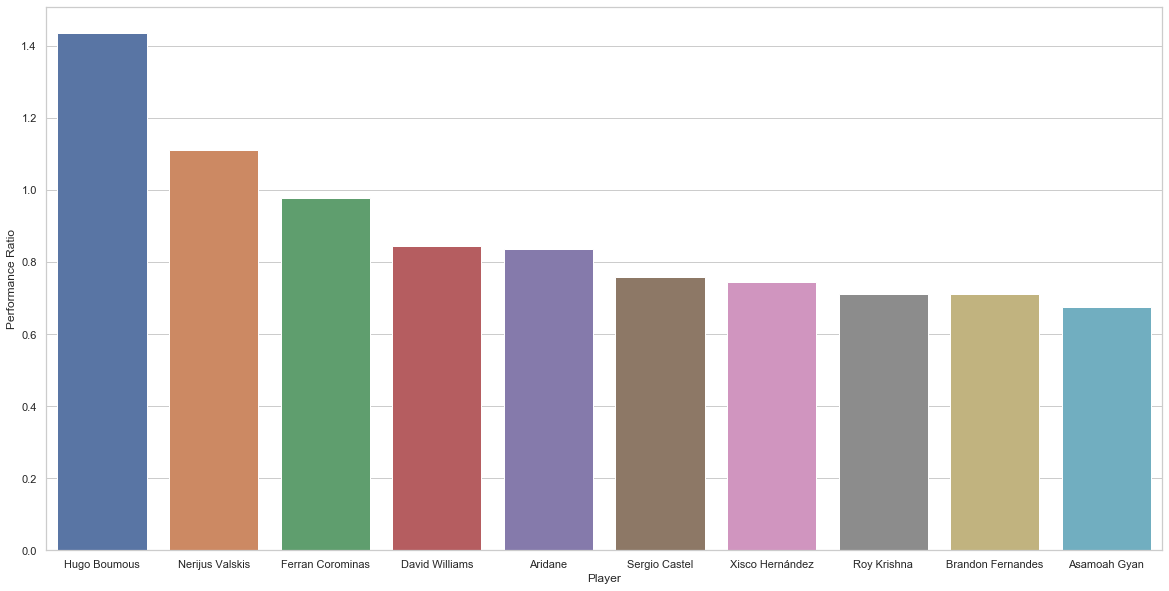

In [381]:
plt.figure(figsize=(20,10))
sns.barplot(x="Player", y="Performance Ratio", data=sorted_pr)

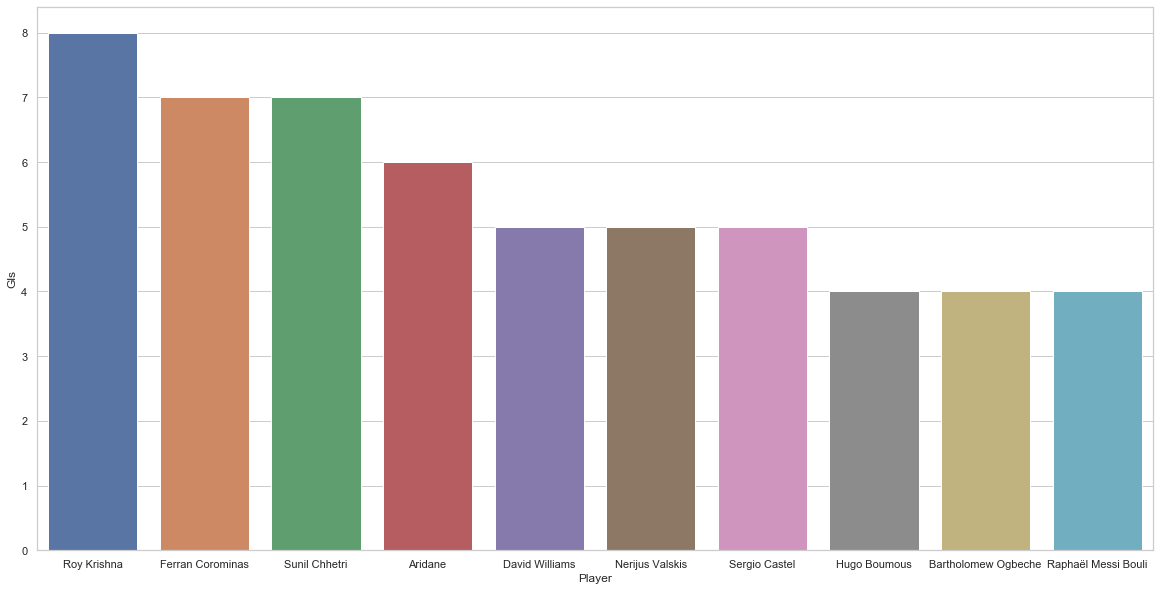

In [372]:
plt.figure(figsize=(20,10))
sns.barplot(x="Player", y="Gls", data=sorted_gls)